# Netflix popular movies dataset

## Table content 
<ui>
<li>Introduction</li>
<li>Data wrangling </li>
<li>Data cleaning </li>
<li>Explore Data analysis </li>
</ui>

## introduction 
### Data Description:

This data is all about Movies That are available on Netflix Website movies title, cast of the movie,desc of movies, duration, rating on IMDB, voted by people, year, genre, certificate
### source
This dataset comes from the IMDB website data is collected by using web scraping

### Data Wrangling 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
#read file 
df=pd.read_csv('n_movies.csv')
df.head()

,title,year,certificate,duration,genre,rating,description,stars,votes
0,Cobra Kai,(2018– ),TV-14,30 min,"Action, Comedy, Drama",8.5,Decades after their 1984 All Valley Karate Tou...,"['Ralph Macchio, ', 'William Zabka, ', 'Courtn...","177,031"
1,The Crown,(2016– ),TV-MA,58 min,"Biography, Drama, History",8.7,Follows the political rivalries and romance of...,"['Claire Foy, ', 'Olivia Colman, ', 'Imelda St...","199,885"
2,Better Call Saul,(2015–2022),TV-MA,46 min,"Crime, Drama",8.9,The trials and tribulations of criminal lawyer...,"['Bob Odenkirk, ', 'Rhea Seehorn, ', 'Jonathan...","501,384"
3,Devil in Ohio,(2022),TV-MA,356 min,"Drama, Horror, Mystery",5.9,When a psychiatrist shelters a mysterious cult...,"['Emily Deschanel, ', 'Sam Jaeger, ', 'Gerardo...","9,773"
4,Cyberpunk: Edgerunners,(2022– ),TV-MA,24 min,"Animation, Action, Adventure",8.6,A Street Kid trying to survive in a technology...,"['Zach Aguilar, ', 'Kenichiro Ohashi, ', 'Emi ...","15,413"


In [4]:
df.shape

(9957, 9)

## Data cleaning 

In [8]:
df=df.drop(['description','stars'],axis=1)
df.shape

(9957, 7)

In [9]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9952    False
9953    False
9954    False
9955    False
9956    False
Length: 9957, dtype: bool

In [11]:
df=df.dropna()
df.isnull().sum()

title          0
year           0
certificate    0
duration       0
genre          0
rating         0
votes          0
dtype: int64

## Explore Data analysis

In [24]:
df['genre'].value_counts()

Animation, Action, Adventure      450
Comedy                            426
Drama                             221
Documentary                       204
Crime, Drama, Mystery             184
                                 ... 
Film-Noir, Thriller                 1
Documentary, Animation, Sci-Fi      1
Comedy, History                     1
Drama, Family, Reality-TV           1
Crime, Drama, Western               1
Name: genre, Length: 455, dtype: int64

In [26]:
df[['title','votes']].sort_values(by='votes',ascending=False).head(10)

,title,votes
8661,JoJo's Bizarre Adventure,999
3005,Life After Death with Tyler Henry,998
5039,Santana,997
8416,Warrior Nun,997
4923,Gie,997
9552,She-Ra and the Princesses of Power,996
4304,Goedam,995
8468,JoJo's Bizarre Adventure,994
2840,Lethal Seduction,993
4112,Latte & the Magic Waterstone,993


In [28]:
df['certificate'].value_counts()

TV-MA        2197
TV-14        1081
R             466
TV-PG         464
Not Rated     458
PG-13         276
TV-Y7         266
PG            154
TV-G          114
TV-Y          109
Unrated        63
G              43
Approved       25
TV-Y7-FV       25
Passed          6
NC-17           4
MA-17           1
12              1
M               1
Name: certificate, dtype: int64

In [12]:
top_10=df.sort_values(by='rating',ascending=False).head(10)
top_10.head()

,title,year,certificate,duration,genre,rating,votes
9444,BoJack Horseman,(2014–2020),TV-MA,26 min,"Animation, Comedy, Drama",9.9,"16,066"
8161,Avatar: The Last Airbender,(2005–2008),TV-Y7,25 min,"Animation, Action, Adventure",9.6,"5,221"
8259,Dexter,(2006–2013),TV-MA,56 min,"Crime, Drama, Mystery",9.6,"10,604"
8557,JoJo's Bizarre Adventure,(2012– ),TV-MA,25 min,"Animation, Action, Adventure",9.6,"1,442"
9578,Stranger Things,(2016– ),TV-14,98 min,"Drama, Fantasy, Horror",9.6,"36,276"


## Q1 the top 10 genre that have the higest rating

In [15]:
# the mean of the rating 
mean_rat=df['rating'].mean()
print(round(mean_rat,2))

6.79


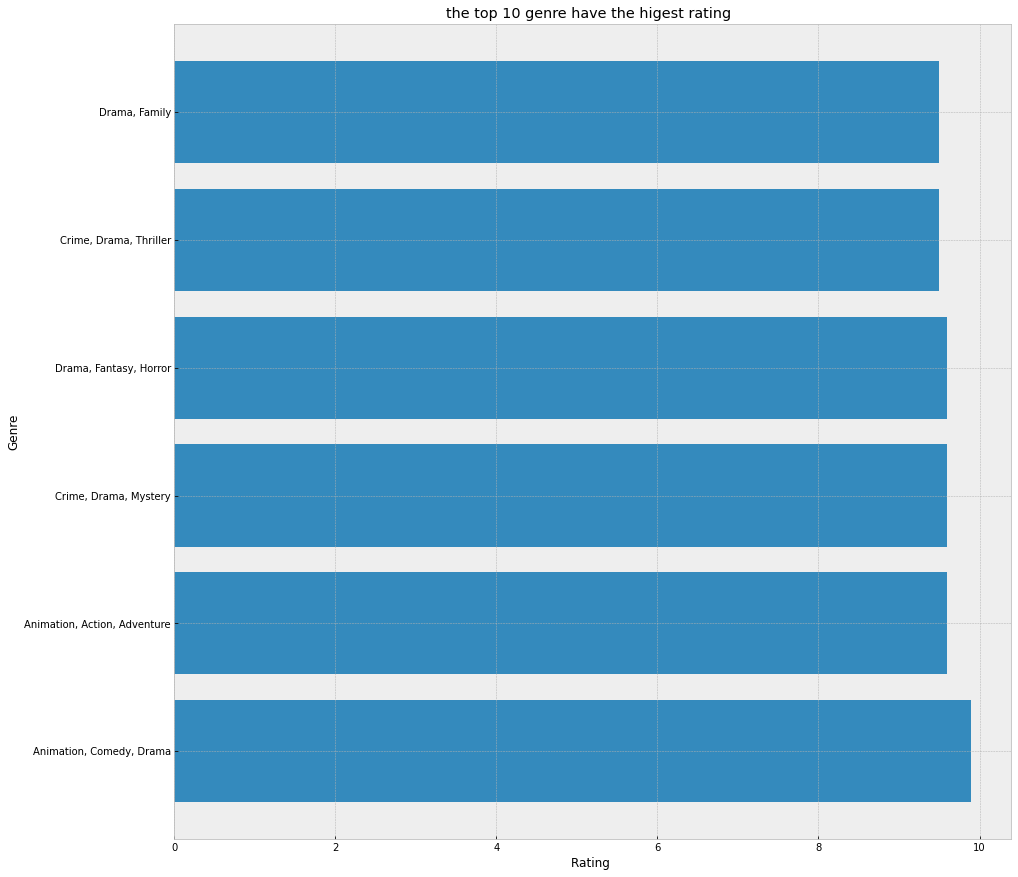

In [22]:
plt.style.use('bmh')
plt.figure(figsize=(15,15))
x=top_10['genre'].values
y=top_10['rating'].values
plt.barh(x,y)
plt.xlabel('Rating ')
plt.ylabel('Genre')
plt.title('the top 10 genre have the higest rating  ')
plt.show()

## Q2 The most certificates were repeated in all the data

In [30]:
df['certificate'].value_counts()

TV-MA        2197
TV-14        1081
R             466
TV-PG         464
Not Rated     458
PG-13         276
TV-Y7         266
PG            154
TV-G          114
TV-Y          109
Unrated        63
G              43
Approved       25
TV-Y7-FV       25
Passed          6
NC-17           4
MA-17           1
12              1
M               1
Name: certificate, dtype: int64

<AxesSubplot:>

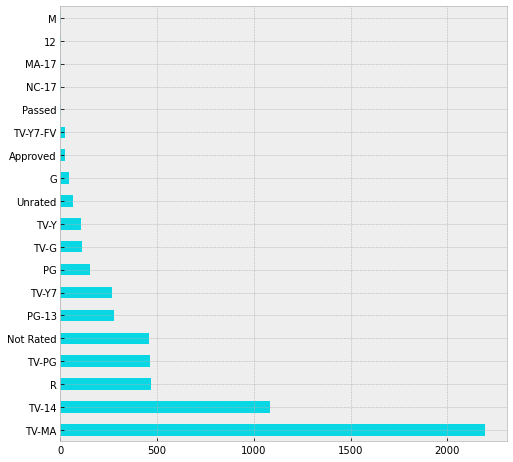

In [29]:
plt.style.use("bmh")
plt.figure(figsize=(8,8))
df['certificate'].value_counts().plot(kind='barh',color="#0AD7E4")

## Q3 the top 10 title that have the higher duartion and votes 

In [38]:
title=df[['title','duration','rating']].sort_values(by=['duration','rating'], ascending=False).head(10)
title.head(10)

,title,duration,rating
943,The Vietnam War,990 min,9.1
4449,The Bleeding Edge,99 min,7.6
4851,Reversing Roe,99 min,7.5
4785,Particle Fever,99 min,7.4
5153,The Short Game,99 min,7.3
5245,Chasing Trane: The John Coltrane Documentary,99 min,7.3
5783,Father Soldier Son,99 min,7.3
6850,Louder Than a Bomb,99 min,7.3
911,The Italian Job,99 min,7.2
4041,Seventeen,99 min,7.2


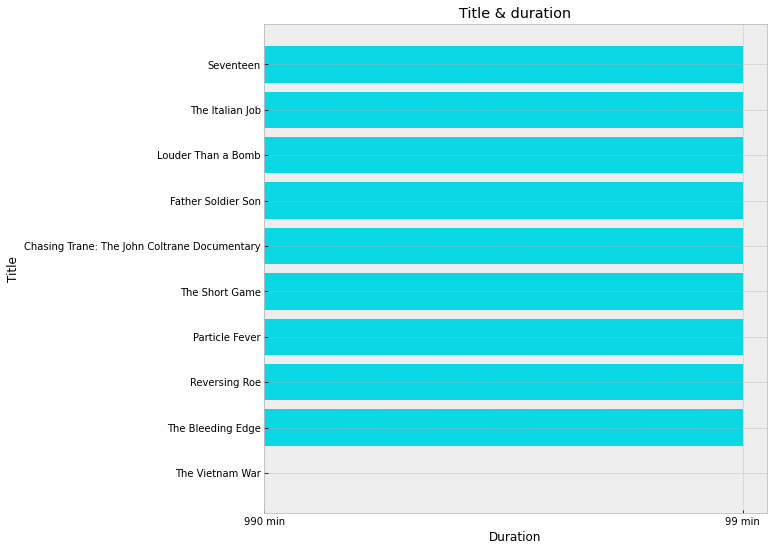

In [46]:
plt.style.use("bmh")
plt.figure(figsize=(9,9))
plt.barh(title['title'].values,title['duration'].values,color="#0AD7E4")
plt.xlabel('Duration')
plt.ylabel('Title')
plt.title('Title & duration')
plt.show()